In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore') 

**Pronostico**

Hay que tener un poco de cuidado, utilizaremos 4 años de data para testear y así pronosticar 6 meses pero no queremos caer en aun así sigue siendo muy pequeña la muestra, por lo que ademas del modelo SARIMA, se utilizará también un modelo estacional como referencia, que utilizará los 12 ultimos meses de la data como muestra para pronosticar los siguientes 6 meses.

Este proceso de comparación se lleva a cabo mediante el metodo Rolling Forecast, tomando como parámetros:
- El Dataframe trabajado.
- Tamaño de la muestra de entrenamiento.
- Horizonte, que corresponde al tamaño de la muestra de prueba.
- Ventana, que corresponde a cuantos puntos queremos pronosticar.
- Método, cuál es el modelo que se utilizará en el pronostico.

De está forma podemos crear una comparación entre las predicciones de varios modelos simultaneamente.

In [127]:
df = pd.read_csv('Data Limpia.csv')
df.columns = ['Fecha', 'Cantidad de Prescripciones']
train = df['Cantidad de Prescripciones'][:156]
test = df['Cantidad de Prescripciones'][156:]

In [40]:
#Creacion de pronostico a partir de ambos modelos.
def Rolling_Forecast(df:pd.DataFrame, 
            Strain: int,         #tamaño del conjunto de entrenamiento   
            horizon: int,        #tamaño del conjunto de prueba
            window: int,         #cuanto queremos pronosticar (en meses)
            method: str) -> list:
    
    total = Strain + horizon
    iex = Strain

    if method == 'Seasonal':
        pred_Seasonal = []
        for i in tqdm_notebook(range(Strain, total, window)):
            Season = df['Cantidad de Prescripciones'][i-window:i].values
            pred_Seasonal.extend(Season)

        return pred_Seasonal

    elif method == 'SARIMA':
        pred_SARIMA = []
        for i in tqdm_notebook(range(Strain, total, window)):
            modelo = SARIMAX(train, order=(2, 1, 3), seasonal_order=(0, 1, 1, 12), simple_differencing=False)
            modelo_SARIMA = modelo.fit(disp=False)
            Pred = modelo_SARIMA.get_prediction(start=0, end=i+window-1)
            Out = Pred.predicted_mean.iloc[-window:]
            pred_SARIMA.extend(Out)

        return pred_SARIMA

In [41]:
valores_originales = df[156:]
valores_originales

,Fecha,Cantidad de Prescripciones
156,2004-07-01,15.33910
157,2004-07-01,15.37076
158,2004-08-01,16.14201
159,2004-09-01,16.68575
160,2004-10-01,17.63673
161,2004-11-01,18.86933
162,2005-01-01,20.77872
163,2005-01-01,12.15455
164,2005-03-01,13.40239
165,2005-04-01,14.45924


Ahora procedemos a asignar valores a las constantes:
- Strain = 156
- Horizon = 48
- Window = 6

In [128]:
Predicciones = df[156:]
Predicciones['Seasonal'] = Rolling_Forecast(df, 156, 48, 12, 'Seasonal')
Predicciones

  0%|          | 0/4 [00:00<?, ?it/s]

,Fecha,Cantidad de Prescripciones,Seasonal
156,2004-07-01,15.33910,12.99805
157,2004-07-01,15.37076,12.51728
158,2004-08-01,16.14201,13.26866
159,2004-09-01,16.68575,14.73362
160,2004-10-01,17.63673,13.66938
161,2004-11-01,18.86933,16.50397
162,2005-01-01,20.77872,18.00377
163,2005-01-01,12.15455,11.93803
164,2005-03-01,13.40239,12.99790
165,2005-04-01,14.45924,12.88265


Ahora agreguemos SARIMA

In [129]:
Predicciones['SARIMA'] = Rolling_Forecast(df, 156, 48, 12, 'SARIMA')
Predicciones

  0%|          | 0/4 [00:00<?, ?it/s]

,Fecha,Cantidad de Prescripciones,Seasonal,SARIMA
156,2004-07-01,15.33910,12.99805,16.745846
157,2004-07-01,15.37076,12.51728,16.619355
158,2004-08-01,16.14201,13.26866,17.255328
159,2004-09-01,16.68575,14.73362,18.107526
160,2004-10-01,17.63673,13.66938,18.722224
161,2004-11-01,18.86933,16.50397,19.885873
162,2005-01-01,20.77872,18.00377,22.216399
163,2005-01-01,12.15455,11.93803,13.544425
164,2005-03-01,13.40239,12.99790,14.972414
165,2005-04-01,14.45924,12.88265,15.593483


La razón para trabajar con una ventana de 12 es porque estamos aplicando get_predict en nuestro modelo en lugar de get_forecast, mas adelante utilizaremos la segunda función pero primero queremos evaluar el desempeño del modelo.

Ya que es confuso ver directamente los valores en la tabla, veamos un grafica comparativa.

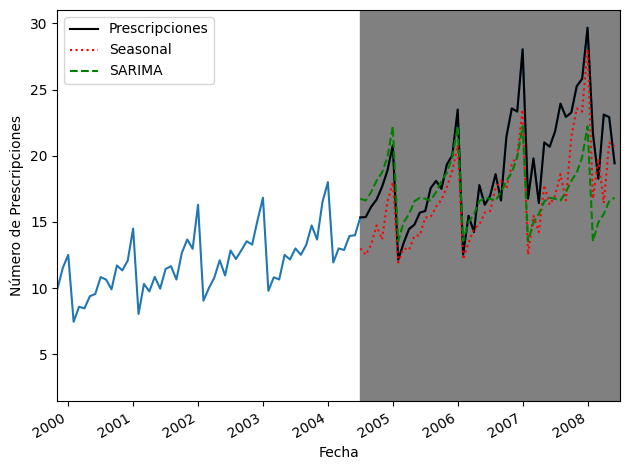

In [130]:
fig, ax = plt.subplots()

ax.plot(df['Cantidad de Prescripciones'])
ax.plot(Predicciones['Cantidad de Prescripciones'],'b-',color='black', label='Prescripciones')
ax.plot(Predicciones['Seasonal'], 'r:', color='red', label='Seasonal')
ax.plot(Predicciones['SARIMA'], 'b--', color='green', label='SARIMA')

ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Prescripciones')
ax.axvspan(156, 204, color='grey')
fig.autofmt_xdate()

plt.legend()
plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))
plt.xlim(100, 204)
plt.tight_layout()

Podemos observar que poco a poco SARIMA se aleja de los valores reales, y esto quizas es debido a que ocupamos pocos datos para el entrenamiento, asique en lugar de dejar 4 años para prueba, dejaremos solo 3 y el resto lo dejaremos para entrenamiento, para esto debemos realizar los mismo pasos que hemos seguido hasta hora desde cero:

- Optimizar para encontrar parámetros.
- Modelar con los parámetros encontrados.
- Pronosticar.

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

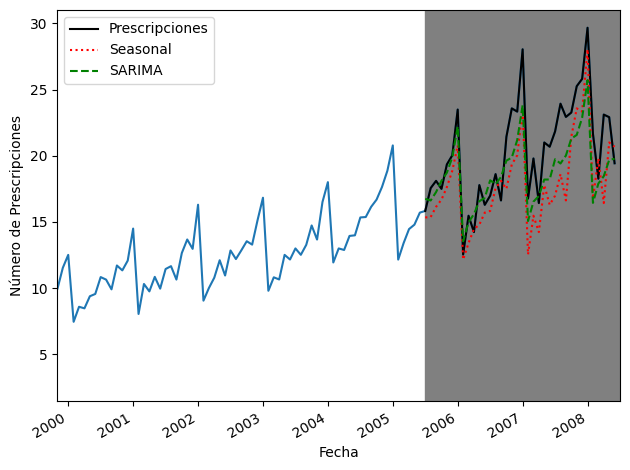

In [56]:
train2 = df['Cantidad de Prescripciones'][:168]
test2 = df['Cantidad de Prescripciones'][168:]

def Rolling_Forecast(df:pd.DataFrame, 
            Strain: int,         #tamaño del conjunto de entrenamiento   
            horizon: int,        #tamaño del conjunto de prueba
            window: int,         #cuanto queremos pronosticar (en meses)
            method: str) -> list:
    
    total = Strain + horizon
    iex = Strain

    if method == 'Seasonal':
        pred_Seasonal = []
        for i in tqdm_notebook(range(Strain, total, window)):
            Season = df['Cantidad de Prescripciones'][i-window:i].values
            pred_Seasonal.extend(Season)

        return pred_Seasonal

    elif method == 'SARIMA':
        pred_SARIMA = []
        for i in tqdm_notebook(range(Strain, total, window)):
            modelo = SARIMAX(train2, order=(3, 1, 1), seasonal_order=(1, 1, 3, 12), simple_differencing=False)
            modelo_SARIMA = modelo.fit(disp=False)
            Pred = modelo_SARIMA.get_prediction(start=0, end=i+window-1)
            Out = Pred.predicted_mean.iloc[-window:]
            pred_SARIMA.extend(Out)

        return pred_SARIMA

Predicciones_2 = df[168:]
Predicciones_2['Seasonal'] = Rolling_Forecast(df, 168, 36, 12, 'Seasonal')
Predicciones_2['SARIMA'] = Rolling_Forecast(df, 168, 36, 12, 'SARIMA')

fig, ax = plt.subplots()
ax.plot(df['Cantidad de Prescripciones'])
ax.plot(Predicciones_2['Cantidad de Prescripciones'],'b-',color='black', label='Prescripciones')
ax.plot(Predicciones_2['Seasonal'], 'r:', color='red', label='Seasonal')
ax.plot(Predicciones_2['SARIMA'], 'b--', color='green', label='SARIMA')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Prescripciones')
ax.axvspan(168, 204, color='grey')
fig.autofmt_xdate()
plt.legend()
plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))
plt.xlim(100, 204)
plt.tight_layout()

**Evaluación de los pronosticos**

Aquí evaluaremos la calidad de los modelos a través de la métrica MAPE (Mean Absolute Percentage Error) el cual es el indicador de desempeño para modelos de pronostico en series de tiempo. Este evalua los modelos midiendo el error porcentual promedio entre los valores pronosticados y los valores reales.

In [57]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_Seasonal   = mape(Predicciones['Cantidad de Prescripciones'], Predicciones['Seasonal'])
MAPE_SARIMA_T48 = mape(Predicciones['Cantidad de Prescripciones'], Predicciones['SARIMA'])     #(2,3,0,1)
MAPE_SARIMA_T36 = mape(Predicciones_2['Cantidad de Prescripciones'], Predicciones_2['SARIMA']) #(3,1,1,3)

print('MAPE Seasonal: ', MAPE_Seasonal, 'MAPE SARIMA T48: ', MAPE_SARIMA_T48, 'MAPE SARIMA T36: ', MAPE_SARIMA_T36)

MAPE Seasonal:  22.58174383008845 MAPE SARIMA T48:  10.066710186919687 MAPE SARIMA T36:  9.327247699923797


Los MAPE obtenidos:
- Seasonal               = 22.58%
- SARIMA(2,1,3)(0,1,1)12 = 10.07%
- SARIMA(3,1,1)(1,1,3)12 = 9.33%

El modelo desarrollado utilizando la predicción a través de la ultima temporada tiene un porcentaje de error promedio mas alto que ambos SARIMA, y en general ambos SARIMA tiene un rendimiendo muy bueno, particularmente SARIMA(2,1,3)(0,1,1) mejor que el anterior con una diferencia no muy significativa entre ellos a pesar de tener año de data de entrenamiento más que SARIMA(3,1,1)(1,1,3).

Podriamos intentar reducir aun mas el horizonte para entrenar pero estariamos arriesgando un overfitting en el modelo.

**Volviendo al objetivo**

Finalmente nos enfocamos en el objetivo inicial, pronosticar los siguientes 6 meses de prescripciones anti-diabeticas en Australia, para ello debemos retocar nuestro modelo.
Como antes estabas prediciendo en el modelo para las muestras utilizabamos la función get_predict, sin embargo, ahora queremos pronosticar 6 meses que desconocemos, por lo que utilizamos get_forecast.

In [123]:
forecast_sarima = []
modelo = SARIMAX(train2, order=(3, 1, 1), seasonal_order=(1, 1, 3, 12), simple_differencing=False)
modelo_SARIMA = modelo.fit(disp=False)
Pred = modelo_SARIMA.get_forecast(6)
Out = Pred.predicted_mean
forecast_sarima.extend(Out)

In [124]:
len(forecast_sarima)

6

Colocando una ventana igual a 6 obtenemos el pronostico de los meses que desconocemos.

**Conclusión**

- Luego de modelar SARIMA obtenemos un error porcentual de 9.33% de que las cantidades pronosticadas difieran de las cantidades reales que vayan a ser descritas en lo que queda del 2008.

- Mientras mas bajo sea el valor del MAPE, mayor es la calidad de pronostico del modelo, y un MAPE de 9.33% es un porcentaje aceptable de error para la cantidad de data que estamos trabajando, sin embargo, esto podría mejorarse si esque tuvieramos una mayor muestra de datos, recordemos que tenemos muestras mensuales entre los años 1991 y 2008.


Con esto finalmente obtenemos el pronostico de la cantidad aproximada de medicinas anti-diabeticas que podrian ser prescritas en Australia. 

In [122]:
df = pd.DataFrame({
    'Fecha': ['2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01', '2009-01-01'],
    'Cantidades pronosticadas de prescripciones': pred_sarima[-6:]
})
df

,Fecha,Cantidades pronosticadas de prescripciones
0,2008-08-01,16.745846
1,2008-09-01,16.619355
2,2008-10-01,17.255328
3,2008-11-01,18.107526
4,2008-12-01,18.722224
5,2009-01-01,19.885873
